In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_l, x_r, t = -1, 1, 1
dx, dt = 0.025, 0.025
nx = int((x_r - x_l) / dx)
nt = int(t / dt)

alpha = 1 / np.pi**2
# pay attention to the beta
beta = 0.5 * alpha * dt / dx**2

u = np.zeros((nt + 1, nx + 1))
x = np.linspace(x_l, x_r, nx+1)

u[0, :] = -np.sin(np.pi*x, dtype=np.double)
u[0, 0], u[0, -1] = 0, 0

a = [-beta for i in range(nx-1)] + [0]
b = [1] + [1.0 + 2 * beta] * (nx-1) + [1]
c = [0] + [-beta] * (nx-1)
for i in range(1, nt+1):
    d = [0] + [beta * u[i-1, j+1] + (1 - 2 * beta) * u[i-1, j] + beta * u[i-1, j-1] for j in range(1, nx)] + [0]
    A = np.diag(b,0) + np.diag(a,-1) + np.diag(c,1)
    u[i, :] = np.linalg.solve(A, d)
u_ref = -np.exp(-t) * np.sin(np.pi * x)
error = np.abs(u_ref - u[-1, :])

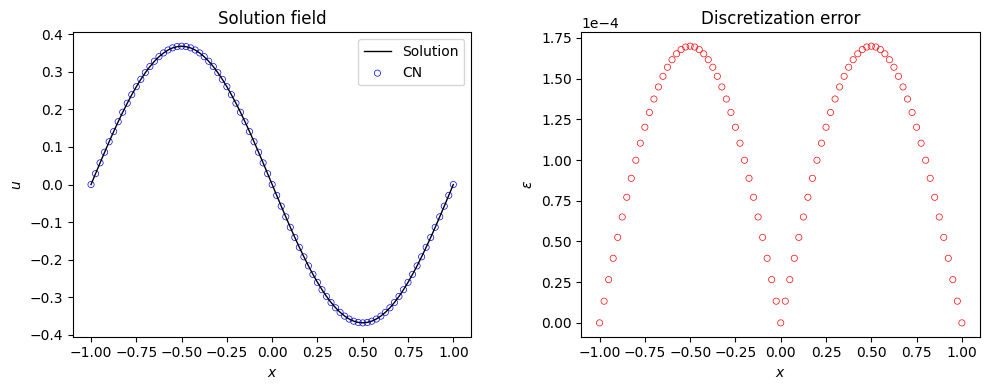

In [2]:
plt.figure(figsize=(10, 4), dpi=100)
plt.subplot(1, 2, 1)
plt.plot(x, u_ref, "k-", linewidth=1.0, label="Solution")
plt.scatter(x, u[-1, :], facecolor="none", edgecolor="blue", s=20, linewidths=0.5, label="CN")
plt.xlabel("$x$")
plt.ylabel("$u$")
plt.title("Solution field")
plt.legend()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(x, error, facecolor="none", edgecolor="red", s=20, linewidths=0.5)
plt.ylabel(r"$\epsilon$")
plt.xlabel("$x$")
plt.title("Discretization error")
plt.tight_layout()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))